In [5]:
import sys
sys.path.append('./')

from facenet_pytorch import MTCNN, InceptionResnetV1


In [6]:
mtcnn = MTCNN(image_size=160, margin=20)

resnet = InceptionResnetV1(pretrained='vggface2').eval()

print("Models are ready to use")

Models are ready to use


In [7]:
from PIL import Image

imag_path = r"C:\Users\shrpa\Desktop\Stroke_proj\images\OP01_02_DDK_PA_color.avi_253.jpg"
save_path = r"C:\Users\shrpa\Desktop\Stroke_proj\images\updated_OP01_02_DDK_PA_color.avi_253.jpg"

img = Image.open(imag_path)

img_cropped = mtcnn(img, save_path)

img_embedding = resnet(img_cropped.unsqueeze(0))

resnet.classify = True
img_probs = resnet(img_cropped.unsqueeze(0))

print("saved")

saved


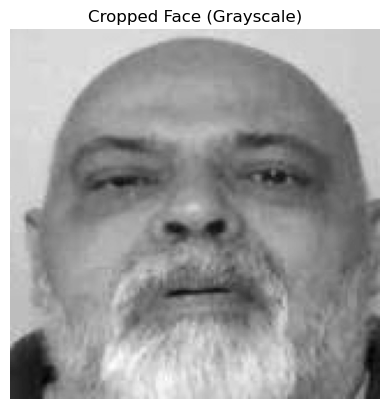

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

if os.path.exists(save_path):
    img = mpimg.imread(save_path)
    
    if img.ndim == 3 and img.shape[2] == 3:
        # Use luminosity method: Y = 0.299 R + 0.587 G + 0.114 B
        img_gray = img[:, :, 0]*0.299 + img[:, :, 1]*0.587 + img[:, :, 2]*0.114
    else:
        img_gray = img  # already grayscale

    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')  
    plt.title("Cropped Face (Grayscale)")
    plt.show()
else:
    print("File not found at:", save_path)
